In [1]:
import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"

import matplotlib.pyplot as plt
from matplotlib.axes import Axes

from simplexity.generative_processes.builder import build_hidden_markov_model
from simplexity.generative_processes.mixed_state_presentation import LogMixedStateTreeGenerator, MyopicEntropies

/home/mattylev/.pyenv/versions/3.12.6/envs/simplex/lib/python3.12/site-packages/jaxtyping/__init__.py:231: UserWarning: jaxtyping version >=0.2.23 should be used with Equinox version >=0.11.1
  warnings.warn(


In [2]:
def plot_entropies(entropies: MyopicEntropies, title: str = "") -> None:
    """Plot the entropies of a generative process."""

    def format_axes(ax: Axes) -> None:
        ax.set_title(title)
        ax.set_xlabel("Sequence Length")
        ax.minorticks_off()
        ax.set_xticks(entropies.sequence_lengths)
        ax.set_xticklabels(map(str, entropies.sequence_lengths))
        ax.set_ylim(bottom=0)

    _, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].plot(entropies.belief_state_entropies, marker="o")
    axs[0].set_ylabel("Belief State Entropy")
    format_axes(axs[0])
    axs[1].plot(entropies.observation_entropies, marker="o")
    axs[1].set_ylabel("Observation Entropy")
    format_axes(axs[1])
    plt.show()

In [ ]:
hmm = build_hidden_markov_model("days_of_week")
generator = LogMixedStateTreeGenerator(hmm, max_sequence_length=4)
entropies = generator.compute_myopic_entropy()
plot_entropies(entropies, title="days_of_week")

In [ ]:
hmm = build_hidden_markov_model("even_ones", p=0.5)
generator = LogMixedStateTreeGenerator(hmm, max_sequence_length=10)
entropies = generator.compute_myopic_entropy()
plot_entropies(entropies, title="even_ones")

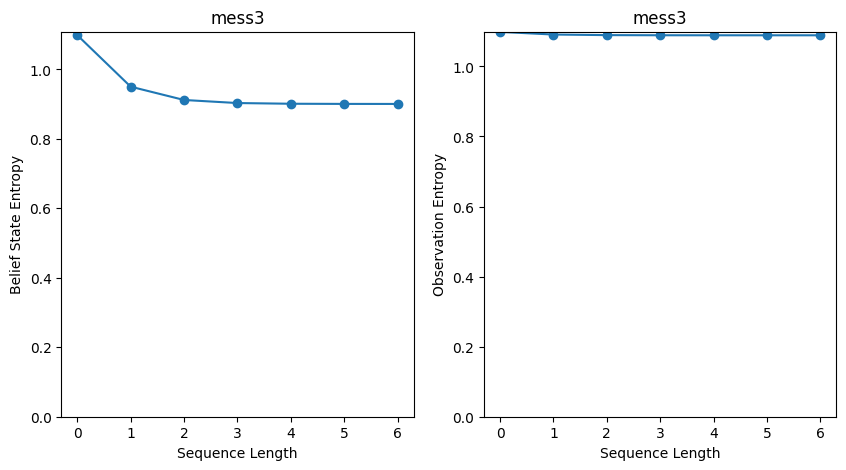

In [3]:
hmm = build_hidden_markov_model("mess3", a=0.6, x=0.15)
generator = LogMixedStateTreeGenerator(hmm, max_sequence_length=6)
entropies = generator.compute_myopic_entropy()
plot_entropies(entropies, title="mess3")

In [4]:
dir(hmm)

['__abstractclassvars__',
 '__abstractmethods__',
 '__abstractvars__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_initial_state',
 'emit_observation',
 'generate',
 'initial_state',
 'log_initial_state',
 'log_normalizing_constant',
 'log_normalizing_eigenvector',
 'log_observation_probability_distribution',
 'log_probability',
 'log_transition_matrices',
 'normalize_belief_state',
 'normalize_log_belief_state',
 'normalizing_constant',
 'normalizing_eigenvector',
 'num_states',
 'obse

In [26]:
import numpy as np
# "type": "tom_quantum",
# "instances": [
#     {"alpha": 1.12, "beta": 5.64},
#     {"alpha": 0.88, "beta": 8.64}

h1 = build_hidden_markov_model("mess3", a=0.55, x=0.12)
h2 = build_hidden_markov_model("mess3", a=0.7, x=0.14)
h3 = build_hidden_markov_model("mess3", a=0.75, x=0.18)
tmat1 = h1.transition_matrices.sum(axis=0)
tmat2 = h2.transition_matrices.sum(axis=0)
tmat3 = h3.transition_matrices.sum(axis=0)
eigvals1, eigvecs1 = np.linalg.eig(tmat1)
eigvals2, eigvecs2 = np.linalg.eig(tmat2)
eigvals3, eigvecs3 = np.linalg.eig(tmat3)
print("Eigenvalues:", eigvals1)
print("Eigenvectors:\n", eigvecs1)
print("Eigenvalues:", eigvals2)
print("Eigenvectors:\n", eigvecs2)
print("Eigenvalues:", eigvals3)
print("Eigenvectors:\n", eigvecs3)

stationary_vector = eigvecs1[:, np.isclose(eigvals1, 1)]
stationary_vector = stationary_vector / stationary_vector.sum(axis=0)
print(f"{stationary_vector.real.T[0]=}")
pi_s = stationary_vector.real.T[0]

Eigenvalues: [0.64 1.   0.64]
Eigenvectors:
 [[-0.8164966   0.57735026 -0.2264554 ]
 [ 0.4082483   0.57735026 -0.5661385 ]
 [ 0.4082483   0.57735026  0.7925939 ]]
Eigenvalues: [1.   0.58 0.58]
Eigenvectors:
 [[ 5.7735026e-01 -7.0710677e-01  4.0824834e-01]
 [ 5.7735026e-01  7.0710677e-01  4.0824834e-01]
 [ 5.7735032e-01 -1.2888597e-09 -8.1649655e-01]]
Eigenvalues: [0.45999998 1.         0.45999998]
Eigenvectors:
 [[-0.8164966   0.57735026  0.2855011 ]
 [ 0.4082483   0.57735026 -0.8052208 ]
 [ 0.4082483   0.57735026  0.5197197 ]]
stationary_vector.real.T[0]=array([0.33333334, 0.33333334, 0.33333334], dtype=float32)


In [ ]:
print(f"{h1.transition_matrices=}")
print(f"{h2.transition_matrices=}")
print(f"{h3.transition_matrices=}")
pi_s_1 = pi_s @ h1.transition_matrices
pi_s_2 = pi_s @ h2.transition_matrices
pi_s_3 = pi_s @ h3.transition_matrices
print(f"{pi_s_1=}")
print(f"{pi_s_2=}")
print(f"{pi_s_3=}")
e1 = pi_s_1.sum(axis=0)
e2 = pi_s_2.sum(axis=0)
e3 = pi_s_3.sum(axis=0)
print(f"{e1=}")
print(f"{e2=}")
print(f"{e3=}")
se1 = -np.sum(e1 * np.log2(e1))
se2 = -np.sum(e2 * np.log2(e2))
se3 = -np.sum(e3 * np.log2(e3))
print(f"{se1=}")
print(f"{se2=}")
print(f"{se3=}")


h1.transition_matrices=Array([[[0.418, 0.027, 0.027],
        [0.066, 0.171, 0.027],
        [0.066, 0.027, 0.171]],

       [[0.171, 0.066, 0.027],
        [0.027, 0.418, 0.027],
        [0.027, 0.066, 0.171]],

       [[0.171, 0.027, 0.066],
        [0.027, 0.171, 0.066],
        [0.027, 0.027, 0.418]]], dtype=float32)
h2.transition_matrices=Array([[[0.504, 0.021, 0.021],
        [0.098, 0.108, 0.021],
        [0.098, 0.021, 0.108]],

       [[0.108, 0.098, 0.021],
        [0.021, 0.504, 0.021],
        [0.021, 0.098, 0.108]],

       [[0.108, 0.021, 0.098],
        [0.021, 0.108, 0.098],
        [0.021, 0.021, 0.504]]], dtype=float32)
h3.transition_matrices=Array([[[0.48  , 0.0225, 0.0225],
        [0.135 , 0.08  , 0.0225],
        [0.135 , 0.0225, 0.08  ]],

       [[0.08  , 0.135 , 0.0225],
        [0.0225, 0.48  , 0.0225],
        [0.0225, 0.135 , 0.08  ]],

       [[0.08  , 0.0225, 0.135 ],
        [0.0225, 0.08  , 0.135 ],
        [0.0225, 0.0225, 0.48  ]]], dtype=float32)
pi_s

In [41]:
import numpy as np

def calculate_conditional_entropy(transition_matrices):
    """
    Calculate conditional entropy for a Mealy HMM.
    
    Args:
        transition_matrices: Array of shape (n_tokens, n_states, n_states)
                           where [i, j, k] is P(next_token=i, next_state=k | current_state=j)
    
    Returns:
        conditional_entropy: The entropy rate (bits per token)
    """
    n_tokens, n_states, _ = transition_matrices.shape
    
    # Step 1: Find stationary distribution of the marginal chain
    # First, get the marginal transition matrix (sum over output tokens)
    marginal_transitions = transition_matrices.sum(axis=0)  # shape: (n_states, n_states)
    
    # Find stationary distribution (eigenvector with eigenvalue 1)
    eigenvalues, eigenvectors = np.linalg.eig(marginal_transitions.T)
    stationary_idx = np.argmax(np.abs(eigenvalues - 1) < 1e-10)
    stationary_dist = np.real(eigenvectors[:, stationary_idx])
    stationary_dist = stationary_dist / stationary_dist.sum()
    
    # Step 2: Calculate conditional entropy
    # H(X_t | X_{t-1}) = sum over states s: pi(s) * H(X_t | s)
    conditional_entropy = 0.0
    
    for state in range(n_states):
        # Get distribution over next tokens given current state
        next_token_probs = transition_matrices[:, state, :].sum(axis=1)  # sum over next states
        
        # Calculate entropy for this state
        # Avoid log(0) by filtering out zero probabilities
        nonzero_probs = next_token_probs[next_token_probs > 0]
        state_entropy = -np.sum(nonzero_probs * np.log2(nonzero_probs))
        
        # Weight by stationary probability
        conditional_entropy += stationary_dist[state] * state_entropy
    
    return conditional_entropy, stationary_dist

ce1, pi1 = calculate_conditional_entropy(h1.transition_matrices)

print(f"Conditional Entropy for HMM 1: {ce1:.4f} bits per token")
print(f"Stationary Distribution for HMM 1: {pi1}")
print(f"\nThis is the theoretical minimum cross-entropy for any predictive model")

Conditional Entropy for HMM 1: 1.5257 bits per token
Stationary Distribution for HMM 1: [0.33333334 0.33333334 0.33333334]

This is the theoretical minimum cross-entropy for any predictive model


In [ ]:
import numpy as np

import numpy as np

def estimate_entropy_rate_monte_carlo(transition_matrices, seq_length=100000, n_sequences=10):
    """
    Estimate entropy rate by sampling sequences and computing empirical entropy.
    """
    transition_matrices = np.array(transition_matrices, dtype=np.float64)
    n_tokens, n_states, _ = transition_matrices.shape
    
    # Find stationary distribution over hidden states
    marginal_transitions = transition_matrices.sum(axis=0)
    eigenvalues, eigenvectors = np.linalg.eig(marginal_transitions.T)
    stationary_idx = np.argmax(np.isclose(eigenvalues, 1, atol=1e-6))
    pi_states = np.real(eigenvectors[:, stationary_idx])
    pi_states = pi_states / pi_states.sum()
    
    total_log_prob = 0.0
    total_steps = 0
    
    for _ in range(n_sequences):
        # Start from stationary distribution
        state = np.random.choice(n_states, p=pi_states)
        belief = pi_states.copy()
        
        for t in range(seq_length):
            # Sample (token, next_state) pair jointly from current state
            # P(token, next_state | current_state)
            joint_probs = transition_matrices[:, state, :].reshape(-1)
            joint_probs = joint_probs / joint_probs.sum()
            
            joint_idx = np.random.choice(len(joint_probs), p=joint_probs)
            token = joint_idx // n_states
            next_state = joint_idx % n_states
            
            # Compute P(token | belief) - marginalize over all states and next states
            pred_prob = 0.0
            for s in range(n_states):
                pred_prob += belief[s] * transition_matrices[token, s, :].sum()
            
            if pred_prob > 0:
                total_log_prob += np.log2(pred_prob)
                total_steps += 1
            
            # Bayesian update: P(S_t | X_t = token, belief_{t-1})
            # P(S_t = s' | token, belief) ∝ Σ_s belief[s] × P(token, s' | s)
            new_belief = np.zeros(n_states)
            for s_next in range(n_states):
                for s_prev in range(n_states):
                    new_belief[s_next] += belief[s_prev] * transition_matrices[token, s_prev, s_next]
            
            # Normalize
            if new_belief.sum() > 0:
                belief = new_belief / new_belief.sum()
            
            state = next_state
    
    entropy_rate = -total_log_prob / total_steps
    return entropy_rate


entropy_rate_1 = estimate_entropy_rate_monte_carlo(h1.transition_matrices, seq_length=10000, n_sequences=5)
entropy_rate_2 = estimate_entropy_rate_monte_carlo(h2.transition_matrices, seq_length=10000, n_sequences=5)
entropy_rate_3 = estimate_entropy_rate_monte_carlo(h3.transition_matrices, seq_length=10000, n_sequences=5)

print(f"Estimated Entropy Rate: {entropy_rate_1:.4f} bits per token")
print(f"Estimated Entropy Rate: {entropy_rate_2:.4f} bits per token")
print(f"Estimated Entropy Rate: {entropy_rate_3:.4f} bits per token")
print(f"This is the theoretical minimum cross-entropy for a predictive model")

eigenvalues=array([0.64000002, 1.00000002, 0.64000002])
eigenvectors=array([[-0.81649658,  0.57735027,  0.11779295],
       [ 0.40824829,  0.57735027, -0.75860614],
       [ 0.40824829,  0.57735027,  0.64081319]])
eigenvalues=array([0.58000002, 1.00000001, 0.58000002])
eigenvectors=array([[-0.81649658,  0.57735027,  0.19717768],
       [ 0.40824829,  0.57735027, -0.78476719],
       [ 0.40824829,  0.57735027,  0.58758951]])
eigenvalues=array([0.45999998, 1.        , 0.45999998])
eigenvectors=array([[-0.81649658,  0.57735027,  0.2855011 ],
       [ 0.40824829,  0.57735027, -0.80522081],
       [ 0.40824829,  0.57735027,  0.51971971]])
Estimated Entropy Rate: 1.5734 bits per token
Estimated Entropy Rate: 1.5325 bits per token
Estimated Entropy Rate: 1.5380 bits per token
This is the theoretical minimum cross-entropy for a predictive model


In [59]:
print(-np.log2(1/243))
print(5 * 1.5747)

7.92481250360578
7.8735


In [69]:
import numpy as np

def estimate_bloch_walk_entropy_mc(alpha=1, beta=np.sqrt(51), 
                                   n_sequences=10000, seq_length=1000):
    """
    Estimate conditional entropy via Monte Carlo sampling.
    Much faster than exhaustive exploration.
    """
    gamma = 1 / (2 * np.sqrt(alpha**2 + beta**2))
    
    # Transition matrices
    T = [
        np.array([[1/4, 0, 2*alpha*beta*gamma**2],
                  [0, (alpha**2 - beta**2)*gamma**2, 0],
                  [2*alpha*beta*gamma**2, 0, 1/4]]),
        np.array([[1/4, 0, -2*alpha*beta*gamma**2],
                  [0, (alpha**2 - beta**2)*gamma**2, 0],
                  [-2*alpha*beta*gamma**2, 0, 1/4]]),
        np.array([[1/4, 2*alpha*beta*gamma**2, 0],
                  [2*alpha*beta*gamma**2, 1/4, 0],
                  [0, 0, (alpha**2 - beta**2)*gamma**2]]),
        np.array([[1/4, -2*alpha*beta*gamma**2, 0],
                  [-2*alpha*beta*gamma**2, 1/4, 0],
                  [0, 0, (alpha**2 - beta**2)*gamma**2]])
    ]
    
    right_vec = np.array([1.0, 0.0, 0.0])
    
    total_log_prob = 0.0
    total_steps = 0
    
    for _ in range(n_sequences):
        # Start from stationary belief
        belief = np.array([1.0, 0.0, 0.0])
        
        for _ in range(seq_length):
            # Compute P(token | belief)
            token_probs = np.array([belief @ T[i] @ right_vec for i in range(4)])
            
            # Sample token
            token = np.random.choice(4, p=token_probs)
            
            # Log probability for entropy calculation
            total_log_prob += np.log2(token_probs[token])
            total_steps += 1
            
            # Update belief
            belief = (belief @ T[token]) / token_probs[token]
    
    # Entropy = -E[log P(X_t | X_{1:t-1})]
    entropy = -total_log_prob / total_steps
    
    return entropy
#     {"alpha": 1.12, "beta": 5.64},
#     {"alpha": 0.88, "beta": 8.64}


# This should run in seconds
tqe1 = estimate_bloch_walk_entropy_mc(alpha=1.12, beta=5.64, n_sequences=5000, seq_length=1000)
tqe2 = estimate_bloch_walk_entropy_mc(alpha=0.88, beta=8.64, n_sequences=5000, seq_length=1000)
print(f"Estimated Conditional Entropy: {tqe1:.4f} bits per token")
print(f"Estimated Conditional Entropy: {tqe2:.4f} bits per token")

Estimated Conditional Entropy: 1.9466 bits per token
Estimated Conditional Entropy: 1.9857 bits per token


In [ ]:
print(f"Total conditional entropy: {entropy_rate_1 + entropy_rate_2 + entropy_rate_3 + tqe1 + tqe2}")

Total conditional entropy: 8.576265021024712


: 

In [67]:
print(-np.log2(1/432))
print(np.exp(-5.9))
print(np.exp(-6.1))

8.754887502163468
0.0027394448187683684
0.0022428677194858034


In [ ]:
hmm = build_hidden_markov_model("no_consecutive_ones", p=0.5)
generator = LogMixedStateTreeGenerator(hmm, max_sequence_length=2)
entropies = generator.compute_myopic_entropy()
plot_entropies(entropies, title="no_consecutive_ones")

In [ ]:
hmm = build_hidden_markov_model("rrxor", pR1=0.5, pR2=0.5)
generator = LogMixedStateTreeGenerator(hmm, max_sequence_length=10)
entropies = generator.compute_myopic_entropy()
plot_entropies(entropies, title="rrxor")

In [ ]:
hmm = build_hidden_markov_model("zero_one_random", p=0.5)
generator = LogMixedStateTreeGenerator(hmm, max_sequence_length=4)
entropies = generator.compute_myopic_entropy()
plot_entropies(entropies, title="zero_one_random")